In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import lightkurve as lk
from astropy.modeling import models, fitting
from astropy.convolution import convolve, Box1DKernel


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [4]:
search_result = lk.search_lightcurve('TIC 903266526')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,SPOC,120,903266526,0.0
1,TESS Sector 46,2021,SPOC,120,903266526,0.0
2,TESS Sector 72,2023,SPOC,20,903266526,0.0
3,TESS Sector 72,2023,SPOC,120,903266526,0.0
4,TESS Sector 45,2021,TESS-SPOC,600,903266526,0.0
5,TESS Sector 46,2021,TESS-SPOC,600,903266526,0.0
6,TESS Sector 72,2023,TESS-SPOC,200,903266526,0.0


In [5]:
# lc = search_result[1].download(download_dir='data/') 

In [6]:
# lc.plot()

In [7]:
# lcn=lc.normalize()
# lcn= lc.flatten(1001)
# lcn.flux = lcn.flux.value -1
# lcn.flux = lcn.flux*100
# lcn.flux_err = lcn.flux_err.value*100

# lcn.scatter()

In [8]:
# pg = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
# # pg = lcn.to_periodogram(method='bls')
# plt.plot(pg.period.to(u.h), pg.power)
# period = pg.period_at_max_power
# print(pg.period_at_max_power.to(u.h))
# plt.xscale('log')
# plt.axvline(4.22, c='C1')

In [9]:
# lcf = lcn.fold(2*4.23*u.h).bin(6*u.min)
# lcf.errorbar()

In [10]:
# tpf_search = lk.search_targetpixelfile('TIC 903266526')

In [11]:
# tpf_search

In [12]:
# tpf = tpf_search[0].download(download_dir='data/') 

In [13]:
# tpf.plot();

In [14]:
# tpf.interact();

In [15]:
# 4.23/24

In [16]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,SPOC,120,903266526,0.0
1,TESS Sector 46,2021,SPOC,120,903266526,0.0
2,TESS Sector 72,2023,SPOC,20,903266526,0.0
3,TESS Sector 72,2023,SPOC,120,903266526,0.0
4,TESS Sector 45,2021,TESS-SPOC,600,903266526,0.0
5,TESS Sector 46,2021,TESS-SPOC,600,903266526,0.0
6,TESS Sector 72,2023,TESS-SPOC,200,903266526,0.0


In [17]:
lc_120s = search_result[search_result.exptime==120*u.s]
lc_120s

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,SPOC,120,903266526,0.0
1,TESS Sector 46,2021,SPOC,120,903266526,0.0
2,TESS Sector 72,2023,SPOC,120,903266526,0.0


In [18]:
lc_600s = search_result[search_result.exptime==600*u.s]
lc_600s

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,TESS-SPOC,600,903266526,0.0
1,TESS Sector 46,2021,TESS-SPOC,600,903266526,0.0


0.012606542605262623 d


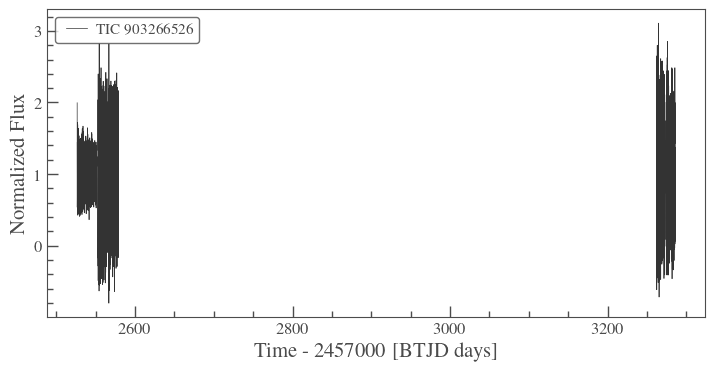

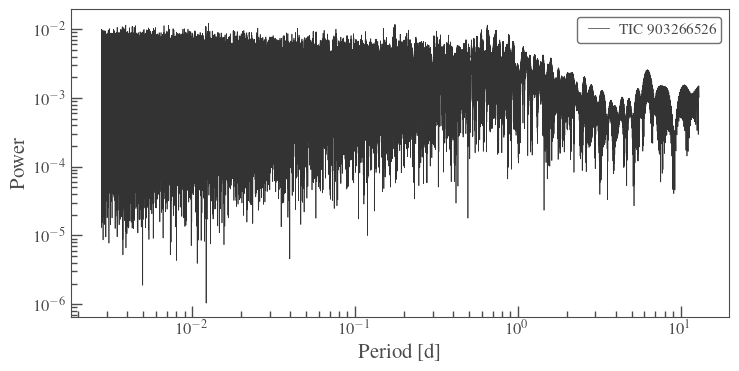

In [19]:
for i, sr in enumerate(lc_120s):
    lci  = sr.download(download_dir='data/')
    # lci.plot()
    # lcn=lc.normalize()
    lcn= lci.flatten(1001)
    # lcn.flux = lcn.flux -1
    # lcn.flux = lcn.flux*100
    # lcn.flux_err = lcn.flux_err.value*100
    
    # lcn.scatter()
    pgi = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
    # pgi.plot(scale='log')
    if i == 0:
        lc = lcn
    else:
        lc = lc.append(lcn)
lc.plot()
pg = lc.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
pg.plot(scale='log')
print(pg.period_at_max_power)

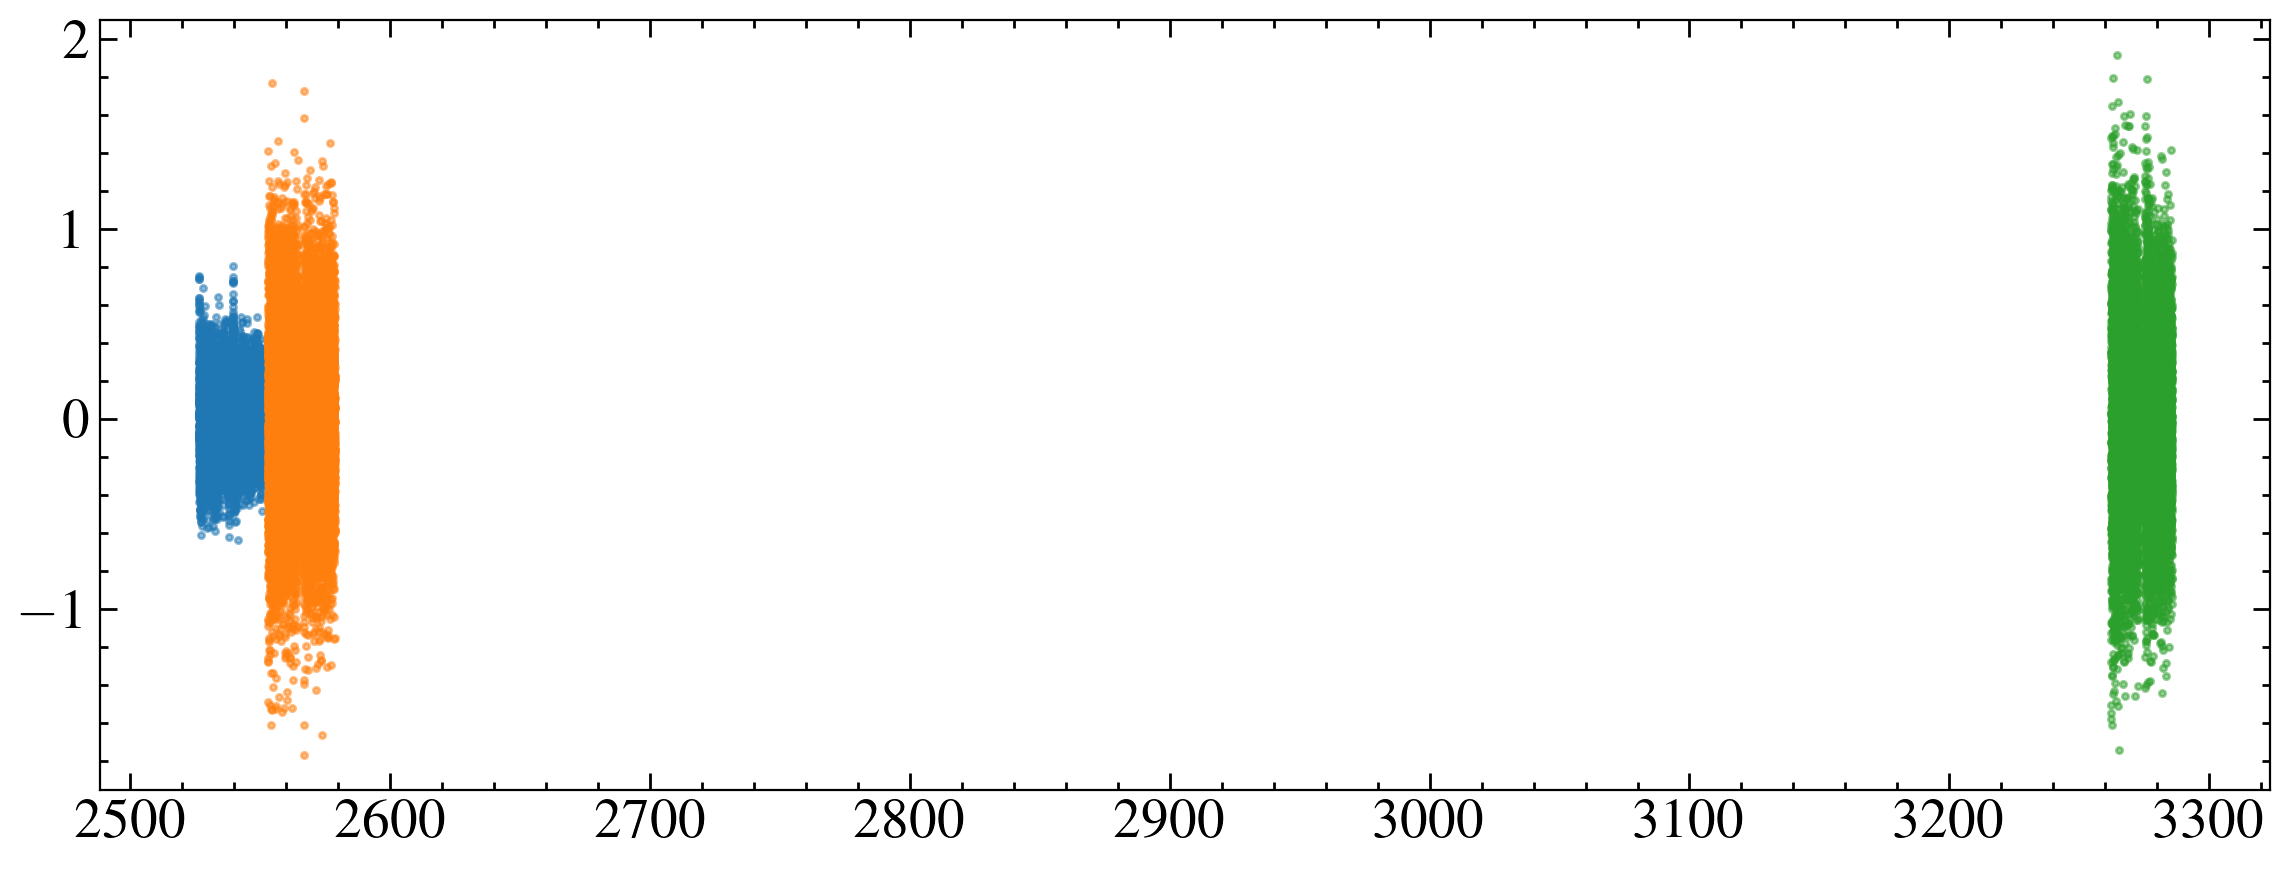

0.44757475080352627
4.217677832234681 h
0.1757365763431117 d


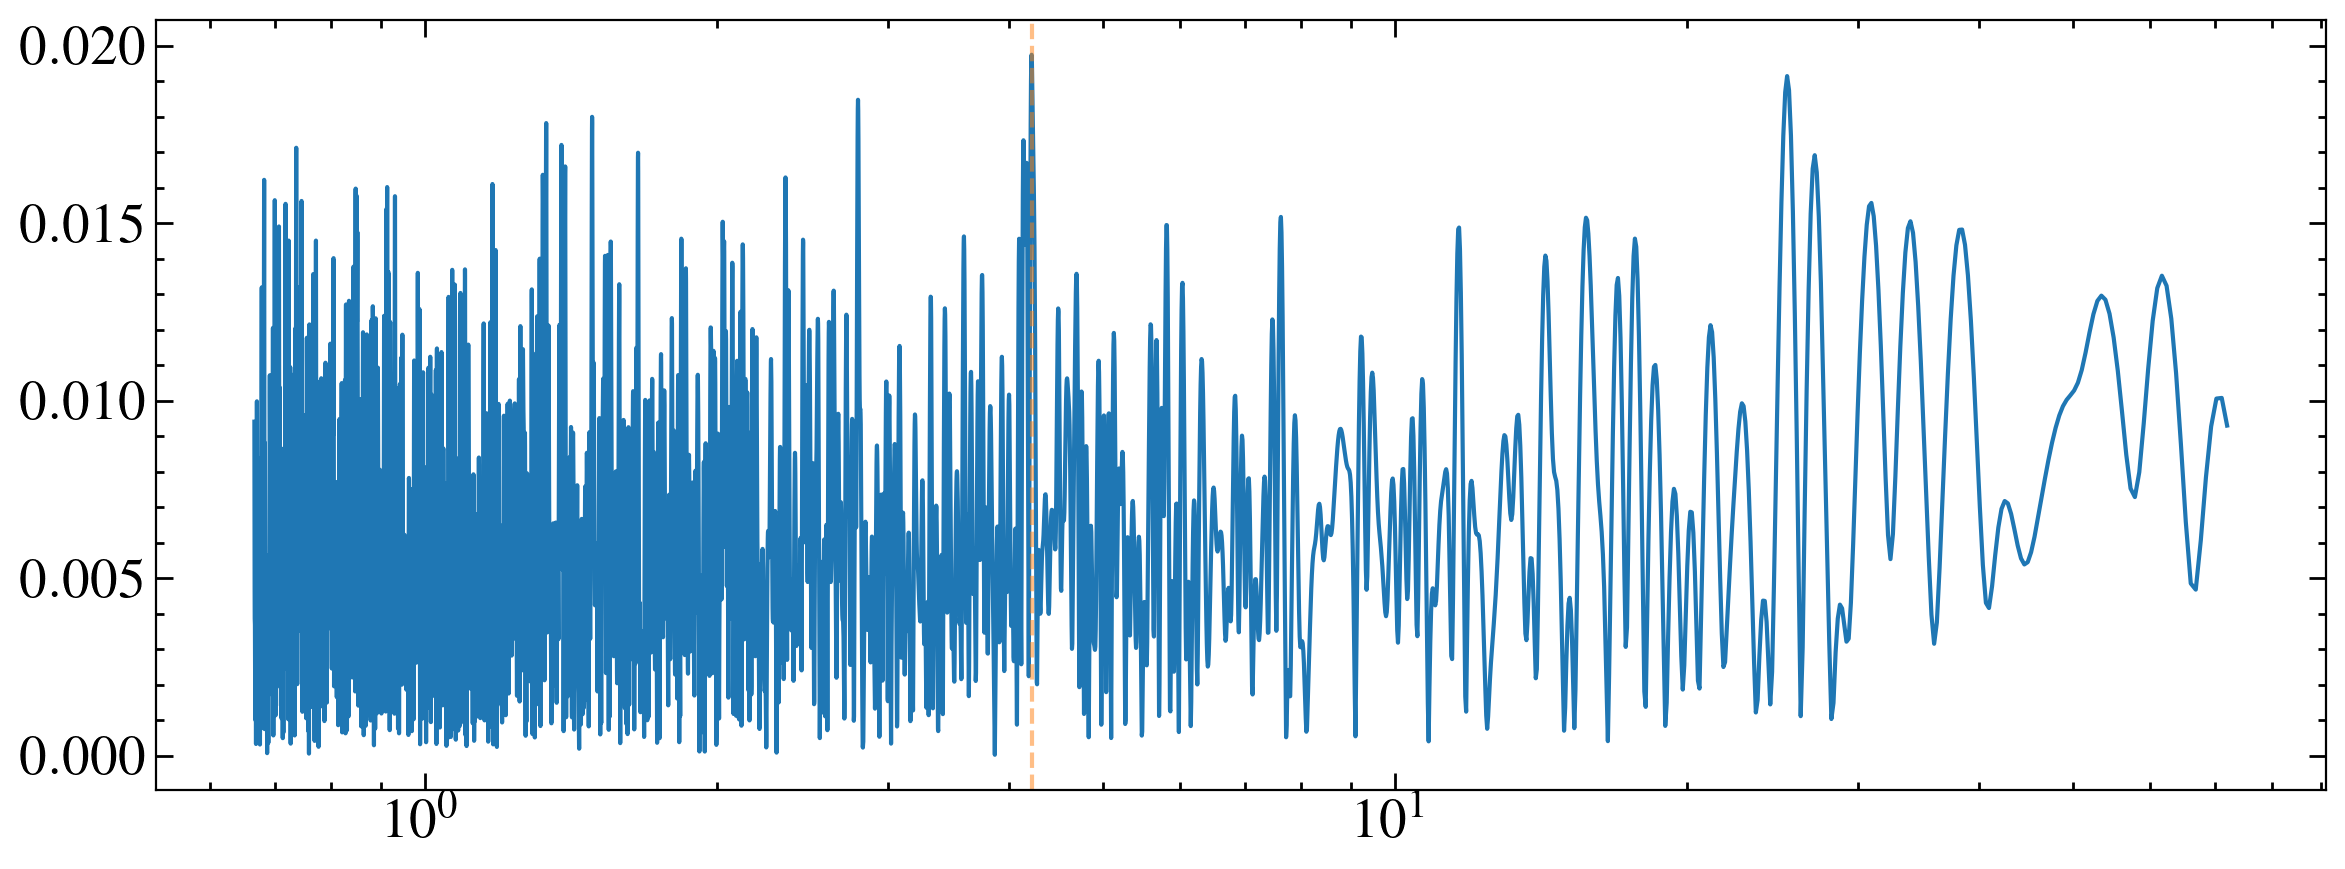

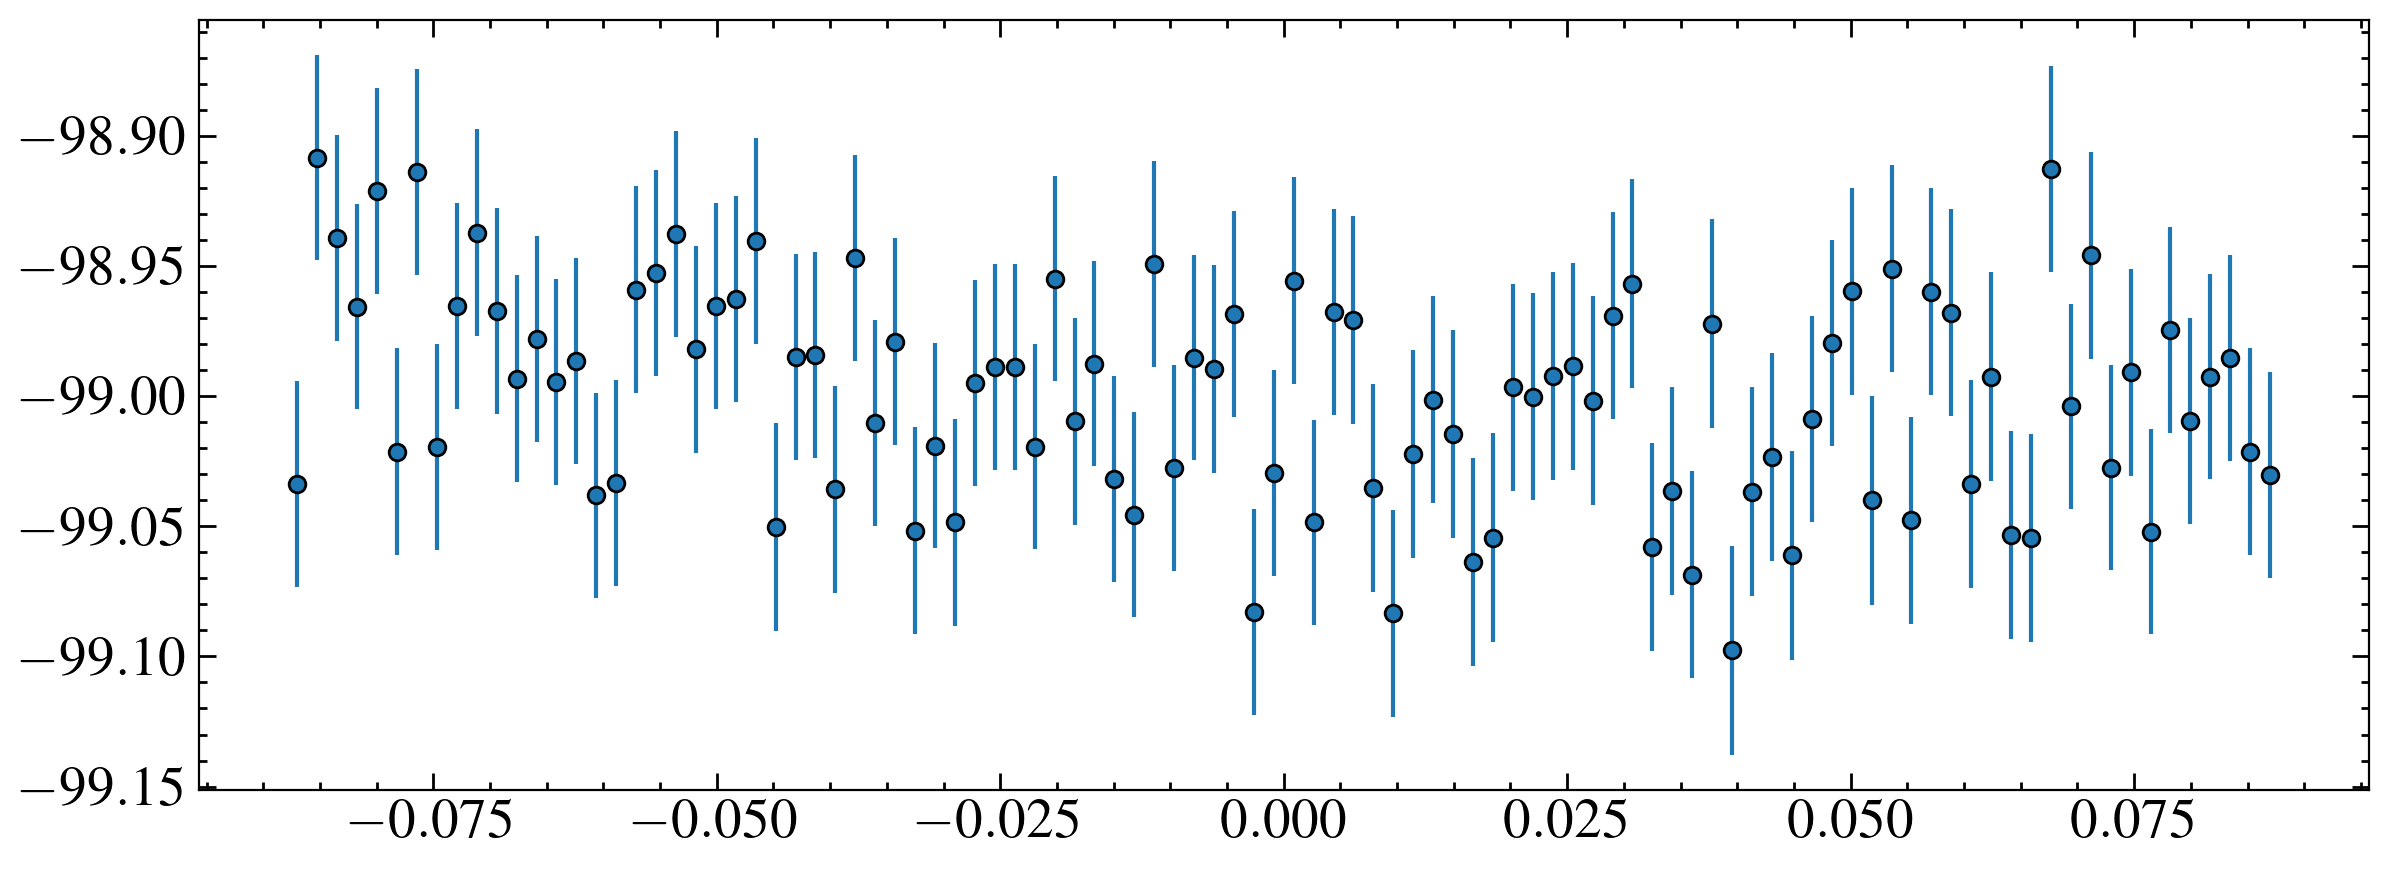

In [20]:

for result in lc_120s:
    # print(result.exptime)
    n  = 0 
    if result.exptime.value == 120 and result.author == 'SPOC':
        lc = result[0].download(download_dir='data/')
        lc =lc.remove_outliers(sigma=5).flatten(10001)
        # lc = lc.normalize('percent')
        plt.scatter(lc.time.value, lc.flux.value-1, s=5, alpha = 0.5, rasterized=True)
        if n == 0:
            lc_all = lc
        else:
            lc_all.append(lc)
        n += 1

plt.show()
print(np.std(lc_all.flux)/np.median(lc_all.flux))
# guessp = coords['Period_d'][i]*u.d
pg = lc_all.to_periodogram(method='ls',oversample_factor=10, minimum_period=40*u.min, maximum_period = 3*u.d)
plt.plot(pg.period.to(u.h), pg.power)
plt.xscale('log')
plt.axvline(4.223, ls='--', c='C1', alpha=0.5)
print(pg.period_at_max_power.to(u.h))
print(pg.period_at_max_power)
plt.show()
bintime = pg.period_at_max_power/100
lcf = lc.fold(pg.period_at_max_power).bin(bintime)
# plt.scatter(lcf.time.value, lcf.flux.value-100, s=5, alpha = 0.5, rasterized=True)
plt.errorbar(lcf.time.value, lcf.flux.value-100, yerr=lcf.flux_err.value, ls='none', marker='o', markeredgecolor='k' )


plt.show()
        
    

What if I just use the first sector, much less noisy?

17.510723280399073 h


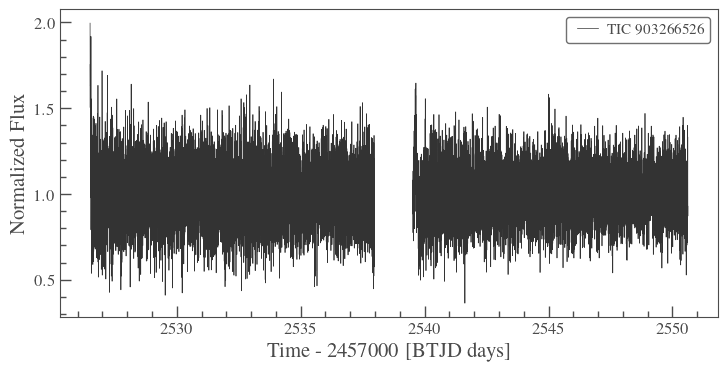

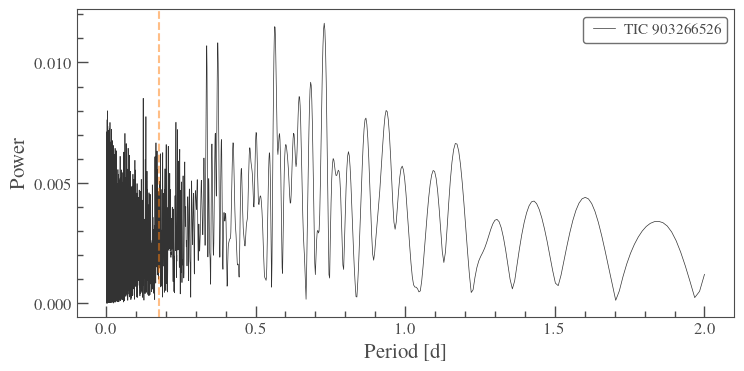

In [31]:
for i, sr in enumerate(lc_120s[0:1]):
    lci  = sr.download(download_dir='data/')
    # lci.plot()
    # lcn=lc.normalize()
    lcn= lci.flatten(1001)
    # lcn.flux = lcn.flux -1
    # lcn.flux = lcn.flux*100
    # lcn.flux_err = lcn.flux_err.value*100
    
    # lcn.scatter()
    pgi = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
    # pgi.plot(scale='log')
    if i == 0:
        lc = lcn
    else:
        lc = lc.append(lcn)
lc.plot()
pg = lc.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 2*u.d)
# pg.plot(scale='log')
pg.plot()
plt.axvline((4.223*u.hr).to(u.d).value, ls='--', c='C1', alpha=0.5)

print(pg.period_at_max_power.to(u.hr))

In [32]:
lc_20s = search_result[search_result.exptime==20*u.s]
lc_20s

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 72,2023,SPOC,20,903266526,0.0


2.3521139803178497 h


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

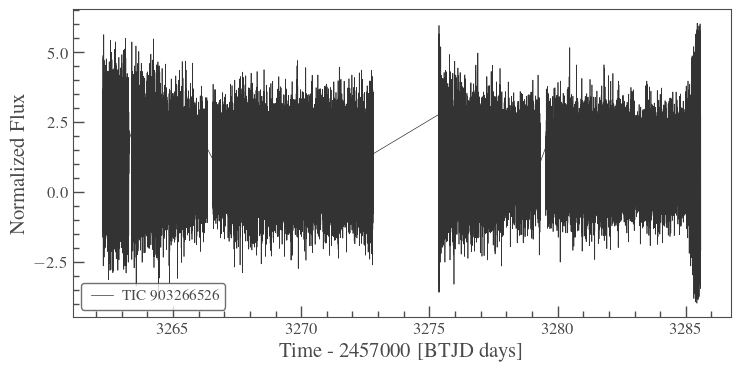

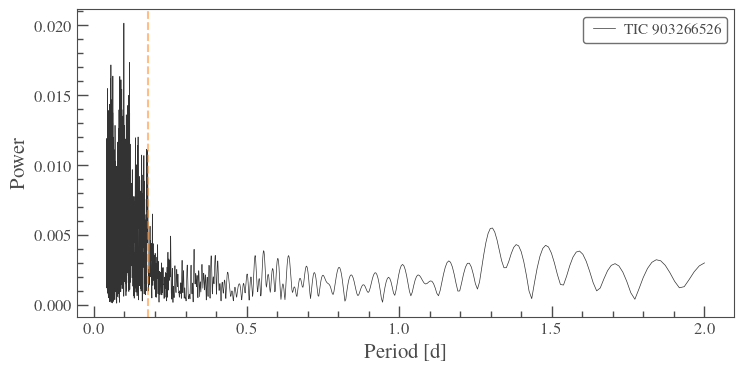

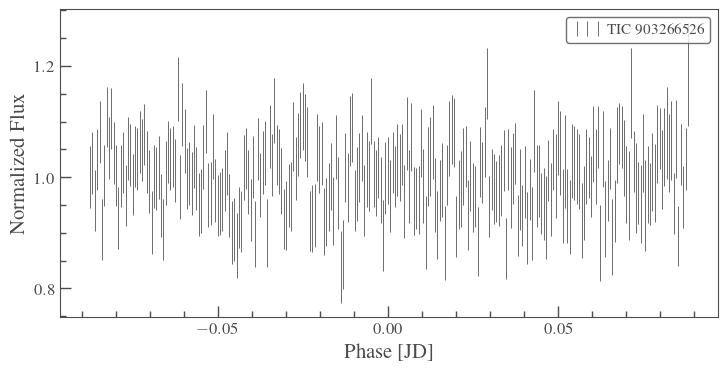

In [43]:
for i, sr in enumerate(lc_20s):
    lci  = sr.download(download_dir='data/')
    # lci.plot()
    # lcn=lc.normalize()
    lcn= lci.flatten(1001).remove_outliers()
    # lcn.flux = lcn.flux -1
    # lcn.flux = lcn.flux*100
    # lcn.flux_err = lcn.flux_err.value*100
    
    # lcn.scatter()
    # pgi = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=1*u.hr, maximum_period = 13*u.d)
    # pgi.plot(scale='log')
    if i == 0:
        lc = lcn
    else:
        lc = lc.append(lcn)
lc.plot()
pg = lc.to_periodogram(method='ls',oversample_factor=10, minimum_period=1*u.hr, maximum_period = 2*u.d)
# pg.plot(scale='log')
pg.plot()
plt.axvline((4.223*u.hr).to(u.d).value, ls='--', c='C1', alpha=0.5)

print(pg.period_at_max_power.to(u.hr))

lcf = lc.fold(4.223*u.hr).bin(1*u.min)
lcf.errorbar()